# Data mining, Project group Nestlé

## I. Data cleaning

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# import dataframes
df_WHR = pd.read_excel("https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls")
df_TauxChomage = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxchomage.csv")
df_TauxPauvrete = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_pauvrete.csv")
df_TauxMortaliteInfantile = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_mortalite_infantile.csv")
df_TauxSuicide = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxsuicide.csv")

     
###World hapiness report



In [17]:
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [18]:
# Features correlations with target value Life Ladder (happinness score)
df_WHR.corr(method="pearson", min_periods=20)["Life Ladder"].sort_values(ascending=False)

Life Ladder                                                 1.000000
Log GDP per capita                                          0.779064
Healthy life expectancy at birth                            0.736797
Delivery Quality                                            0.707940
Social support                                              0.702461
Democratic Quality                                          0.614572
Most people can be trusted, WVS round 1981-1984             0.554803
Positive affect                                             0.543377
Freedom to make life choices                                0.520988
Most people can be trusted, WVS round 2005-2009             0.477312
Most people can be trusted, WVS round 1994-1998             0.475632
Most people can be trusted, WVS round 2010-2014             0.348629
Most people can be trusted, WVS round 1999-2004             0.266804
Generosity                                                  0.197423
Most people can be trusted, Gallup

In [19]:
df_WHR.corr(method="pearson", min_periods=20)["Life Ladder"].abs().sort_values(ascending=False)

Life Ladder                                                 1.000000
Log GDP per capita                                          0.779064
Standard deviation/Mean of ladder by country-year           0.753971
Healthy life expectancy at birth                            0.736797
Delivery Quality                                            0.707940
Social support                                              0.702461
Democratic Quality                                          0.614572
Most people can be trusted, WVS round 1981-1984             0.554803
Positive affect                                             0.543377
Freedom to make life choices                                0.520988
Most people can be trusted, WVS round 2005-2009             0.477312
Most people can be trusted, WVS round 1994-1998             0.475632
Perceptions of corruption                                   0.420750
Most people can be trusted, WVS round 2010-2014             0.348629
gini of household income reported 

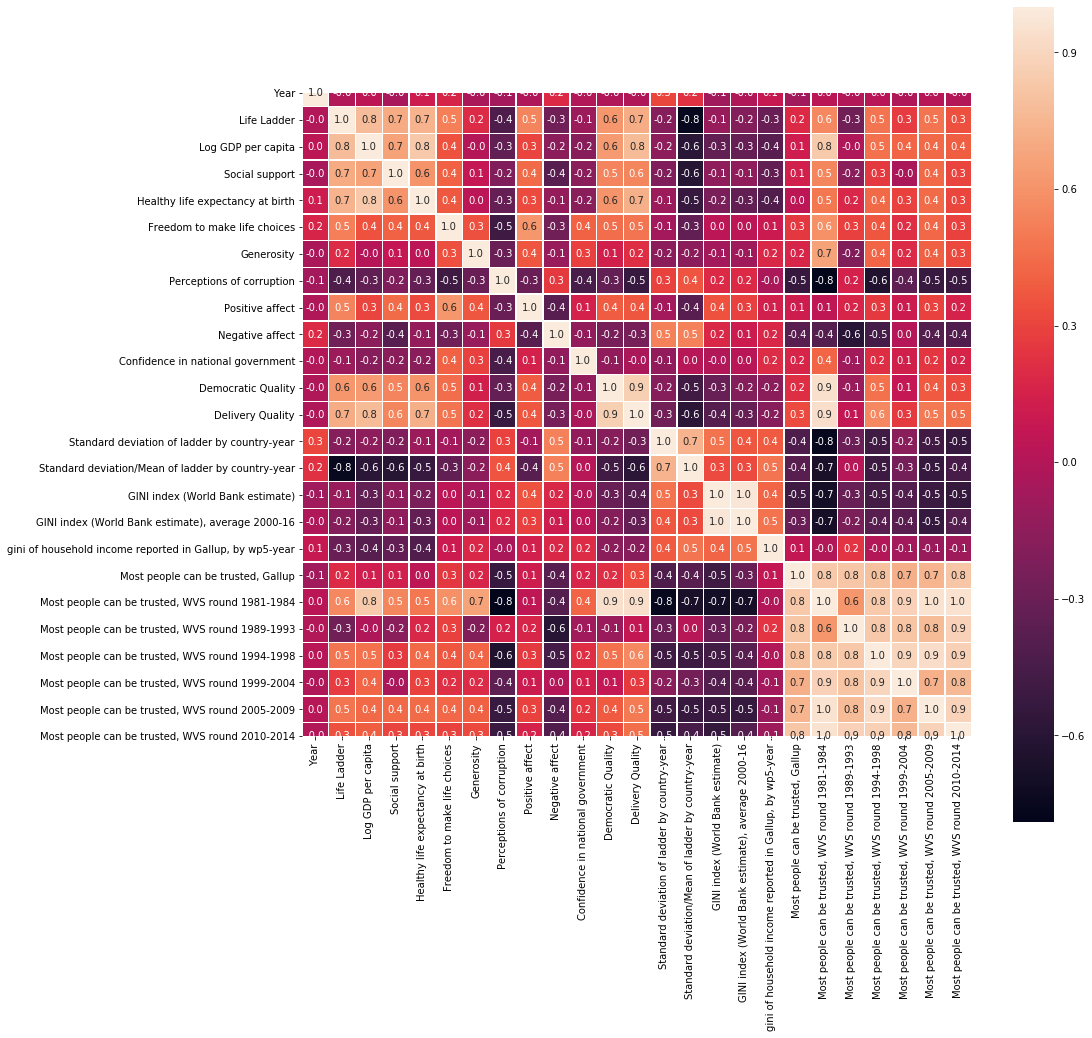

In [20]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_WHR.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax, square = True)

In [0]:
# Drop null data for world hapiness score dataset
df_WHR.dropna(inplace=True)
# Check if there are null for data for world hapiness score dataset
df_WHR.isnull().sum()

In [0]:
# Droping the features according the correlation
to_drop = [ 'Social support','Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014',]

df_WHR.drop(to_drop, inplace=True, axis=1)
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth
0,Afghanistan,2008,3.723590,7.168690,50.799999
1,Afghanistan,2009,4.401778,7.333790,51.200001
2,Afghanistan,2010,4.758381,7.386629,51.599998
3,Afghanistan,2011,3.831719,7.415019,51.919998
4,Afghanistan,2012,3.782938,7.517126,52.240002
...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,52.380001
1700,Zimbabwe,2015,3.703191,7.556052,53.799999
1701,Zimbabwe,2016,3.735400,7.538829,54.400002
1702,Zimbabwe,2017,3.638300,7.549491,55.000000


###Unemployement rate 

In [0]:
# The value represents the percentage of the active poplulation
df_TauxChomage



,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,UNEMP,TOT,PC_LF,A,2006,4.785240,NaN
1,AUS,UNEMP,TOT,PC_LF,A,2007,4.379151,NaN
2,AUS,UNEMP,TOT,PC_LF,A,2008,4.234330,NaN
3,AUS,UNEMP,TOT,PC_LF,A,2009,5.560385,NaN
4,AUS,UNEMP,TOT,PC_LF,A,2010,5.213340,NaN
...,...,...,...,...,...,...,...,...
555,LTU,UNEMP,TOT,PC_LF,A,2014,10.699690,NaN
556,LTU,UNEMP,TOT,PC_LF,A,2015,9.119895,NaN
557,LTU,UNEMP,TOT,PC_LF,A,2016,7.860914,NaN
558,LTU,UNEMP,TOT,PC_LF,A,2017,7.071820,NaN


In [0]:
#here we check the unique country codes in the dataframe
unique_country_code1 = df_TauxChomage.LOCATION.unique()
unique_country_code1

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'EU28', 'OECD', 'EA19', 'COL', 'LVA', 'LTU'],
      dtype=object)

In [0]:
#we create a map of the country codes and assign the country name
country1={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'JPN':'Japan',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania'
}

In [0]:
df_TauxChomage['Country'] = df_TauxChomage['LOCATION'].map(country1)


In [0]:
#keep only the colums we want to work with
to_drop = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxChomage.drop(to_drop, inplace=True, axis=1)
df_TauxChomage

,TIME,Value,Country
0,2006,4.785240,Australia
1,2007,4.379151,Australia
2,2008,4.234330,Australia
3,2009,5.560385,Australia
4,2010,5.213340,Australia
...,...,...,...
555,2014,10.699690,Lithuania
556,2015,9.119895,Lithuania
557,2016,7.860914,Lithuania
558,2017,7.071820,Lithuania


In [0]:
# Drop null data for Unemployement rate  dataset
df_TauxChomage.dropna(inplace=True)
# Check if there are null for data for Unemployement rate  dataset
df_TauxChomage.isnull().sum()

TIME       0
Value      0
Country    0
dtype: int64

###Poverty rate 

In [0]:
# The value represents The poverty rate corresponds to the proportion of people
#  whose income is below the poverty line, i.e. half of the median income of the total population
df_TauxPauvrete

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN
...,...,...,...,...,...,...,...,...
303,CRI,POVERTY,TOT,RT,A,2014,0.215,NaN
304,CRI,POVERTY,TOT,RT,A,2015,0.206,NaN
305,CRI,POVERTY,TOT,RT,A,2016,0.209,NaN
306,CRI,POVERTY,TOT,RT,A,2017,0.204,NaN


In [0]:
unique_country_code2 = df_TauxPauvrete.LOCATION.unique()
unique_country_code2

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KOR', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'EST', 'ISR', 'SVN', 'JPN', 'CHL', 'LVA', 'LTU',
       'BRA', 'CHN', 'IND', 'RUS', 'ZAF', 'CRI'], dtype=object)

In [0]:
country2={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [0]:
df_TauxPauvrete['COUNTRY'] = df_TauxPauvrete['LOCATION'].map(country2)
df_TauxPauvrete

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN,Australia
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN,Australia
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN,Australia
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN,Austria
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN,Austria
...,...,...,...,...,...,...,...,...,...
303,CRI,POVERTY,TOT,RT,A,2014,0.215,NaN,Costa rica
304,CRI,POVERTY,TOT,RT,A,2015,0.206,NaN,Costa rica
305,CRI,POVERTY,TOT,RT,A,2016,0.209,NaN,Costa rica
306,CRI,POVERTY,TOT,RT,A,2017,0.204,NaN,Costa rica


In [0]:
to_drop = ['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes','LOCATION']
df_TauxPauvrete.drop(to_drop, inplace=True, axis=1)
df_TauxPauvrete


,TIME,Value,COUNTRY
0,2012,0.140,Australia
1,2014,0.128,Australia
2,2016,0.121,Australia
3,2007,0.097,Austria
4,2008,0.092,Austria
...,...,...,...
303,2014,0.215,Costa rica
304,2015,0.206,Costa rica
305,2016,0.209,Costa rica
306,2017,0.204,Costa rica


In [0]:
# Drop null data for Poverty rate  dataset
df_TauxPauvrete.dropna(inplace=True)
# Check if there are null for data for Poverty rate dataset
df_TauxPauvrete.isnull().sum()

TIME       0
Value      0
COUNTRY    0
dtype: int64

###Child mortality rate

In [0]:
# The value represents the number of deaths per 1000 live births
df_TauxMortaliteInfantile

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2006,4.7,NaN
1,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2007,4.1,NaN
2,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2008,4.1,NaN
3,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2009,4.2,NaN
4,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2010,4.1,NaN
...,...,...,...,...,...,...,...,...
520,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2013,8.7,NaN
521,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2014,8.1,NaN
522,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2015,7.7,NaN
523,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2016,7.9,NaN


In [0]:
unique_country_code3 = df_TauxMortaliteInfantile.LOCATION.unique()
unique_country_code3

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI'],
      dtype=object)

In [0]:
country3={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [0]:
df_TauxMortaliteInfantile['COUNTRY'] = df_TauxMortaliteInfantile['LOCATION'].map(country3)
df_TauxMortaliteInfantile

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2006,4.7,NaN,Australia
1,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2007,4.1,NaN,Australia
2,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2008,4.1,NaN,Australia
3,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2009,4.2,NaN,Australia
4,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2010,4.1,NaN,Australia
...,...,...,...,...,...,...,...,...,...
520,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2013,8.7,NaN,Costa rica
521,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2014,8.1,NaN,Costa rica
522,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2015,7.7,NaN,Costa rica
523,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2016,7.9,NaN,Costa rica


In [0]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxMortaliteInfantile.drop(to_drop, inplace=True, axis=1)
df_TauxMortaliteInfantile

,TIME,Value,COUNTRY
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia
...,...,...,...
520,2013,8.7,Costa rica
521,2014,8.1,Costa rica
522,2015,7.7,Costa rica
523,2016,7.9,Costa rica


In [0]:
# Drop null data for Child mortality rate  dataset
df_TauxMortaliteInfantile.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxMortaliteInfantile.isnull().sum()

TIME       0
Value      0
COUNTRY    0
dtype: int64

###Suicide rate

In [0]:
#The value represents the number of deaths per 100,000
df_TauxSuicide

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN
...,...,...,...,...,...,...,...,...
426,CRI,SUICIDE,TOT,100000PER,A,2010,7.1,NaN
427,CRI,SUICIDE,TOT,100000PER,A,2011,7.1,NaN
428,CRI,SUICIDE,TOT,100000PER,A,2012,6.7,NaN
429,CRI,SUICIDE,TOT,100000PER,A,2013,7.0,NaN


In [0]:
unique_country_code4 = df_TauxSuicide.LOCATION.unique()
unique_country_code4

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'GBR', 'USA', 'BRA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'ZAF',
       'TUR', 'COL', 'LVA', 'LTU', 'CRI'], dtype=object)

In [0]:
country4={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [0]:
df_TauxSuicide['COUNTRY'] = df_TauxSuicide['LOCATION'].map(country4)
df_TauxSuicide

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN,Australia
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN,Australia
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN,Australia
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN,Australia
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN,Australia
...,...,...,...,...,...,...,...,...,...
426,CRI,SUICIDE,TOT,100000PER,A,2010,7.1,NaN,Costa rica
427,CRI,SUICIDE,TOT,100000PER,A,2011,7.1,NaN,Costa rica
428,CRI,SUICIDE,TOT,100000PER,A,2012,6.7,NaN,Costa rica
429,CRI,SUICIDE,TOT,100000PER,A,2013,7.0,NaN,Costa rica


In [0]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxSuicide.drop(to_drop, inplace=True, axis=1)
df_TauxSuicide

,TIME,Value,COUNTRY
0,2006,10.5,Australia
1,2007,10.6,Australia
2,2008,10.9,Australia
3,2009,10.7,Australia
4,2010,10.9,Australia
...,...,...,...
426,2010,7.1,Costa rica
427,2011,7.1,Costa rica
428,2012,6.7,Costa rica
429,2013,7.0,Costa rica


In [0]:
# Drop null data for Child mortality rate  dataset
df_TauxSuicide.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxSuicide.isnull().sum()

TIME       0
Value      0
COUNTRY    0
dtype: int64

## II. Data grouping and comparaison among the countries and regions

In [0]:
#Check for the unique values of country names
unique_C = df_WHR['Country name'].unique()
unique_C

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [0]:
#map of region according to countries
region1={
'Afghanistan' : 'Asia-Pacific',
'Albania' : 'Eastern Europe',
'Algeria' : 'Africa',
'Angola' : 'Africa',
'Argentina' : 'Latin America',
'Armenia' : 'Asia-Pacific',
'Australia' : 'Asia-Pacific',
'Austria' : 'Western Europe',
'Azerbaijan' : 'Asia-Pacific',
'Bahrain' : 'Asia-Pacific',
'Bangladesh' : 'Asia-Pacific', 
'Belarus' : 'Eastern Europe', 
'Belgium' : 'Western Europe', 
'Belize' : 'Latin America', 
'Benin' : 'Africa', 
'Bhutan' : 'Asia-Pacific',
'Bolivia' : 'Latin America', 
'Bosnia and Herzegovina' : 'Eastern Europe', 
'Botswana' : 'Africa', 
'Brazil' : 'Latin America',
'Bulgaria' : 'Eastern Europe', 
'Burkina Faso' : 'Africa', 
'Burundi' : 'Africa', 
'Cambodia' : 'Asia-Pacific', 
'Cameroon' : 'Africa',
'Canada' : 'North America', 
'Central African Republic' : 'Africa', 
'Chad': 'Africa', 
'Chile' : 'Latin America', 
'China' : 'Asia-Pacific',
'Colombia' : 'Latin America', 
'Comoros' : 'Africa', 
'Congo (Brazzaville)' : 'Africa', 
'Congo (Kinshasa)' : 'Africa',
'Costa Rica' : 'Latin America', 
'Croatia' : 'Eastern Europe', 
'Cuba' : 'Latin America', 
'Cyprus' : 'Eastern Europe', 
'Czech Republic' : 'Western Europe',
'Denmark' : 'Western Europe', 
'Djibouti' : 'Africa', 
'Dominican Republic' : 'Latin America', 
'Ecuador' : 'Latin America', 
'Egypt' : 'Africa',
'El Salvador' : 'Latin America', 
'Estonia' : 'Eastern Europe', 
'Ethiopia' : 'Africa', 
'Finland' : 'Western Europe', 
'France' : 'Western Europe', 
'Gabon' : 'Africa',
'Gambia' : 'Africa', 
'Georgia' : 'Asia-Pacific', 
'Germany' : 'Western Europe', 
'Ghana' : 'Africa', 
'Greece' : 'Eastern Europe', 
'Guatemala' : 'Latin America',
'Guinea' : 'Africa', 
'Guyana' : 'Latin America', 
'Haiti' : 'Latin America', 
'Honduras' : 'Latin America',
'Hong Kong S.A.R. of China' : 'Asia-Pacific', 
'Hungary' : 'Eastern Europe', 
'Iceland' : 'Western Europe', 
'India' : 'Asia-Pacific',
'Indonesia' : 'Asia-Pacific', 
'Iran' : 'Asia-Pacific', 
'Iraq' : 'Asia-Pacific', 
'Ireland' : 'Western Europe', 
'Israel' : 'Asia-Pacific', 
'Italy' : 'Western Europe',
'Ivory Coast' : 'Africa', 
'Jamaica' : 'Africa', 
'Japan' : 'Asia-Pacific', 
'Jordan' : 'Asia-Pacific', 
'Kazakhstan' : 'Asia-Pacific', 
'Kenya' : 'Africa',
'Kosovo' : 'Eastern Europe', 
'Kuwait' : 'Asia-Pacific', 
'Kyrgyzstan' : 'Asia-Pacific', 
'Laos' : 'Asia-Pacific', 
'Latvia' : 'Eastern Europe', 
'Lebanon' : 'Asia-Pacific',
'Lesotho' : 'Africa', 
'Liberia' : 'Africa', 
'Libya' : 'Africa', 
'Lithuania' : 'Eastern Europe', 
'Luxembourg' : 'Western Europe',
'Macedonia' : 'Eastern Europe', 
'Madagascar' : 'Africa', 
'Malawi' : 'Africa', 
'Malaysia' : 'Asia-Pacific', 
'Mali' : 'Africa', 
'Malta' : 'Western Europe',
'Mauritania' : 'Africa', 
'Mauritius' : 'Africa', 
'Mexico' : 'Latin America', 
'Moldova' : 'Eastern Europe', 
'Mongolia' : 'Asia-Pacific',
'Montenegro' : 'Eastern Europe', 
'Morocco' : 'Africa', 
'Mozambique' : 'Africa', 
'Myanmar' : 'Asia-Pacific', 
'Namibia' : 'Africa',
'Nepal' : 'Asia-Pacific', 
'Netherlands' : 'Western Europe', 
'New Zealand' : 'Asia-Pacific', 
'Nicaragua' : 'Latin America', 
'Niger' : 'Africa',
'Nigeria' : 'Africa', 
'North Cyprus' : 'Eastern Europe', 
'Norway' : 'Western Europe', 
'Oman' : 'Asia-Pacific', 
'Pakistan' : 'Asia-Pacific',
'Palestinian Territories': 'Asia-Pacific', 
'Panama' : 'Latin America', 
'Paraguay' : 'Latin America', 
'Peru' : 'Latin America',
'Philippines' : 'Asia-Pacific', 
'Poland' : 'Eastern Europe', 
'Portugal' : 'Western Europe', 
'Qatar' : 'Asia-Pacific', 
'Romania' : 'Eastern Europe',
'Russia' : 'Eastern Europe',
'Rwanda' : 'Africa', 
'Saudi Arabia' : 'Asia-Pacific', 
'Senegal' : 'Africa', 
'Serbia' : 'Eastern Europe', 
'Sierra Leone' : 'Africa',
'Singapore' : 'Asia-Pacific', 
'Slovakia' : 'Eastern Europe', 
'Slovenia' : 'Eastern Europe', 
'Somalia' : 'Africa',
'Somaliland region' : 'Africa', 
'South Africa' : 'Africa', 
'South Korea' : 'Asia-Pacific', 
'South Sudan' : 'Africa',
'Spain' : 'Western Europe', 
'Sri Lanka' : 'Asia-Pacific', 
'Sudan' : 'Africa', 
'Suriname' : 'Latin America', 
'Swaziland' : 'Africa', 
'Sweden' : 'Western Europe',
'Switzerland' : 'Western Europe', 
'Syria' : 'Asia-Pacific', 
'Taiwan Province of China' : 'Asia-Pacific', 
'Tajikistan' : 'Asia-Pacific',
'Tanzania' : 'Africa', 
'Thailand' : 'Asia-Pacific', 
'Togo' : 'Africa', 
'Trinidad and Tobago' : 'Latin America', 
'Tunisia' : 'Africa',
'Turkey' : 'Asia-Pacific', 
'Turkmenistan' : 'Asia-Pacific', 
'Uganda' : 'Africa', 
'Ukraine' : 'Eastern Europe',
'United Arab Emirates' : 'Asia-Pacific', 
'United Kingdom' : 'Western Europe', 
'United States' : 'North America',
'Uruguay' : 'Latin America', 
'Uzbekistan' : 'Asia-Pacific', 
'Venezuela' : 'Latin America', 
'Vietnam' : 'Asia-Pacific', 
'Yemen' : 'Asia-Pacific', 
'Zambia' : 'Africa',
'Zimbabwe' : 'Africa'
}

In [0]:
#Add Region column to the main dataframe
df_WHR['Region'] = df_WHR['Country name'].map(region1)
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Africa
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Africa
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Africa
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Africa


## III. Graphs(Bar plots,Histogramms,Scatter plots...)

## IV. Correlation with the features of the other 4 datasets

## V. Prediction 